# Lesson 1: First look at MEG and EEG

Neurocampus course "Signals of the whole brain"

Daria Kleeva

dkleeva@gmail.com

February 18, 2025



## Time series

A **time series** is a signal measured over time.

In EEG/MEG, each channel records voltage or magnetic field changes as a function of time. So the raw recording is a set of time series.

### Core concepts

1) Continuous-time signal

2) Discrete-time signal

3) Analog signal

4) Digital signal

In practice for EEG/MEG:
- Physics in the head and sensors is **continuous** and **analog**.
- The acquisition system converts it into **discrete-time** and **digital** data.

### Examples

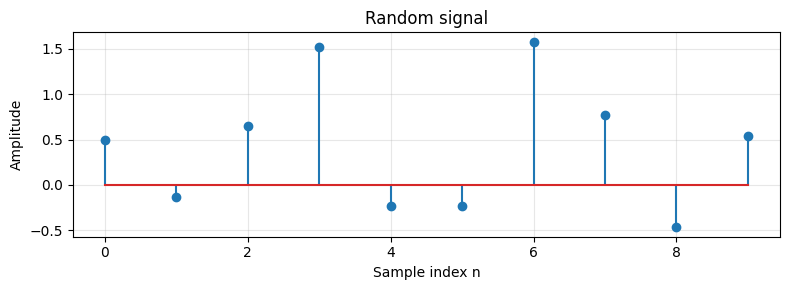

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.randn(10)  
n = np.arange(len(x))

plt.figure(figsize=(8, 3))
plt.stem(n, x)
plt.title('Random signal')
plt.xlabel('Sample index n')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [2]:
# Basic signal descriptors
print('Indices n:', n)
print('Amplitude values x[n]:', np.round(x, 3))
print('Amplitude range [min, max]:', [x.min(), x.max()])
print('Min amplitude:', x.min())
print('Max amplitude:', x.max())
print('Mean:', x.mean())
print('Variance:', x.var())

Indices n: [0 1 2 3 4 5 6 7 8 9]
Amplitude values x[n]: [ 0.497 -0.138  0.648  1.523 -0.234 -0.234  1.579  0.767 -0.469  0.543]
Amplitude range [min, max]: [np.float64(-0.4694743859349521), np.float64(1.5792128155073915)]
Min amplitude: -0.4694743859349521
Max amplitude: 1.5792128155073915
Mean: 0.44806111169875623
Variance: 0.4704669452131567


In a computer we cannot create a truly continuous signal, but we can use a very dense time grid as a practical approximation.

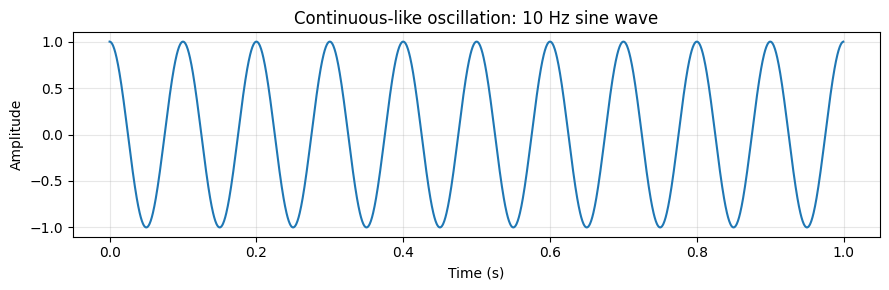

In [ ]:
fs = 2000
T = 1.0         
f = 10           

t_cont = np.linspace(0, T, int(fs * T), endpoint=False)
x_cont = np.sin(2 * np.pi * f * t_cont)

plt.figure(figsize=(9, 3))
plt.plot(t_cont, x_cont, lw=1.5)
plt.title('Continuous-like oscillation: 10 Hz sine wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<div style="color: blue;">
Try:

- To change frequency;
- To change amplitude;
- To add phase;
- To add noise;
- To mix oscillations.
</div>

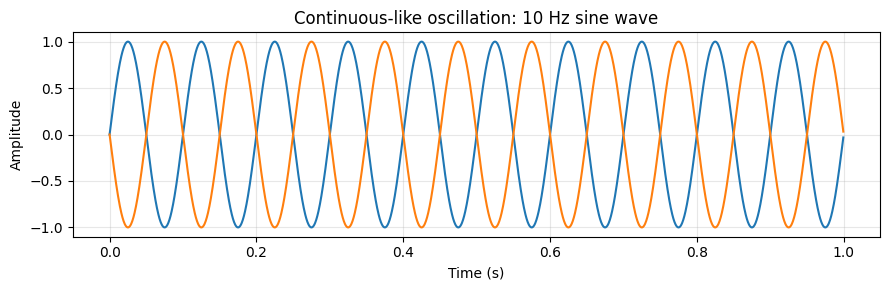

In [17]:
fs = 2000
T = 1.0         
f = 10           

t_cont = np.linspace(0, T, int(fs * T), endpoint=False)
x_cont = np.sin(2 * np.pi * f * t_cont)
x_cont_shifted =np.sin(2 * np.pi * f * t_cont-np.pi)

plt.figure(figsize=(9, 3))
plt.plot(t_cont, x_cont, lw=1.5)
plt.plot(t_cont, x_cont_shifted, lw=1.5)
plt.title('Continuous-like oscillation: 10 Hz sine wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

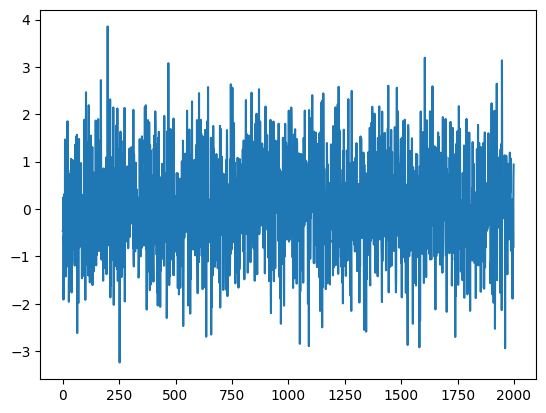

In [20]:
plt.plot(noise)

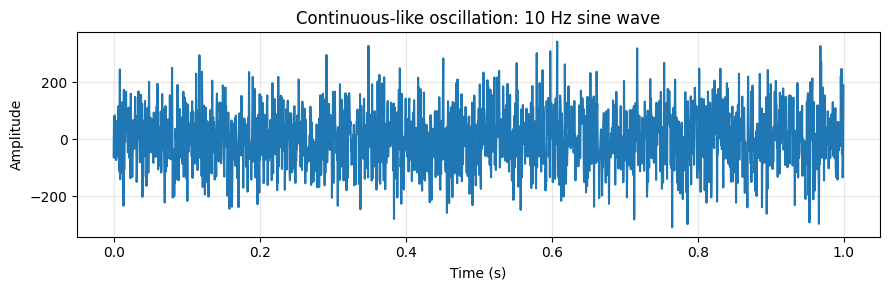

In [26]:
fs = 2000
T = 1.0         
f = 10           

t_cont = np.linspace(0, T, int(fs * T), endpoint=False)
x_cont = np.sin(2 * np.pi * f * t_cont)
noise=np.random.randn(len(t_cont))
x_cont_noisy=x_cont+100*noise

plt.figure(figsize=(9, 3))
plt.plot(t_cont, x_cont_noisy, lw=1.5)
plt.title('Continuous-like oscillation: 10 Hz sine wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

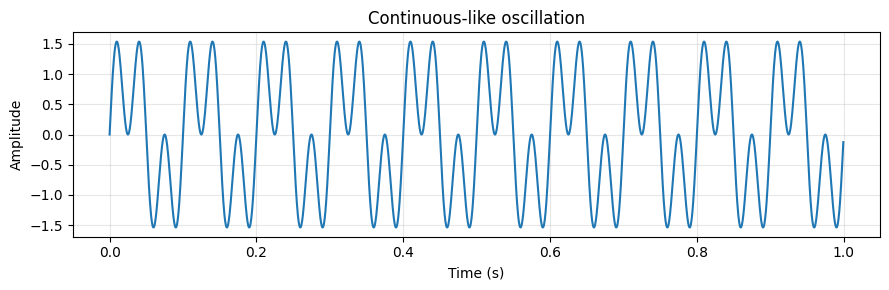

In [32]:
fs = 2000
T = 1.0         
f_1 = 10           
f_2 = 30

t_cont = np.linspace(0, T, int(fs * T), endpoint=False)
x_cont_1 = np.sin(2 * np.pi * f_1 * t_cont)
x_cont_2 = np.sin(2 * np.pi * f_2 * t_cont)
x_cont_mixed = x_cont_1 + x_cont_2

plt.figure(figsize=(9, 3))
plt.plot(t_cont, x_cont_mixed, lw=1.5)
plt.title('Continuous-like oscillation')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Sampling**  (continuous-time -> discrete-time) is the process of measuring the signal at specific time points.

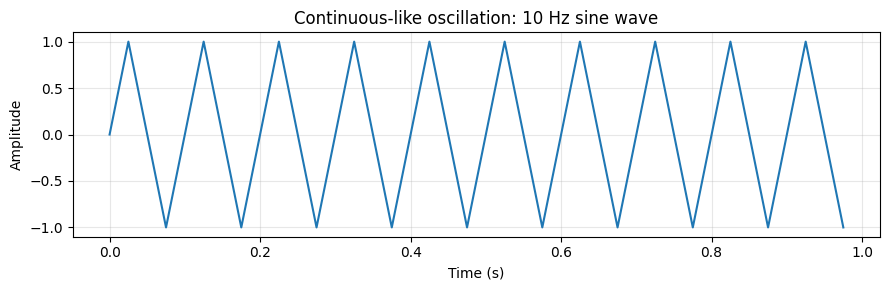

In [33]:
fs = 40

f=10

t_cont = np.linspace(0, T, int(fs * T), endpoint=False)
x_cont = np.sin(2 * np.pi * f * t_cont)

plt.figure(figsize=(9, 3))
plt.plot(t_cont, x_cont, lw=1.5)
plt.title('Continuous-like oscillation: 10 Hz sine wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Aliasing effect:**  when we sample too slowly, a fast oscillation can look like a slower one.

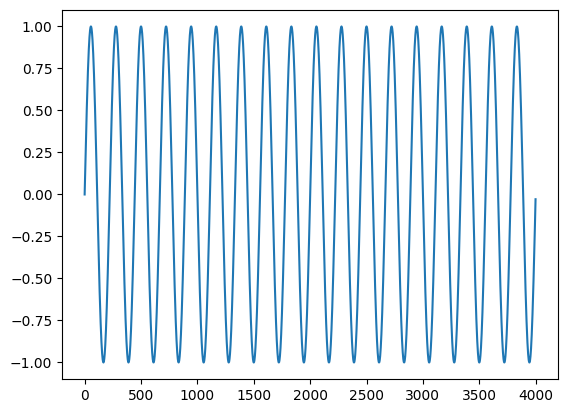

In [35]:
plt.plot(x_ref)

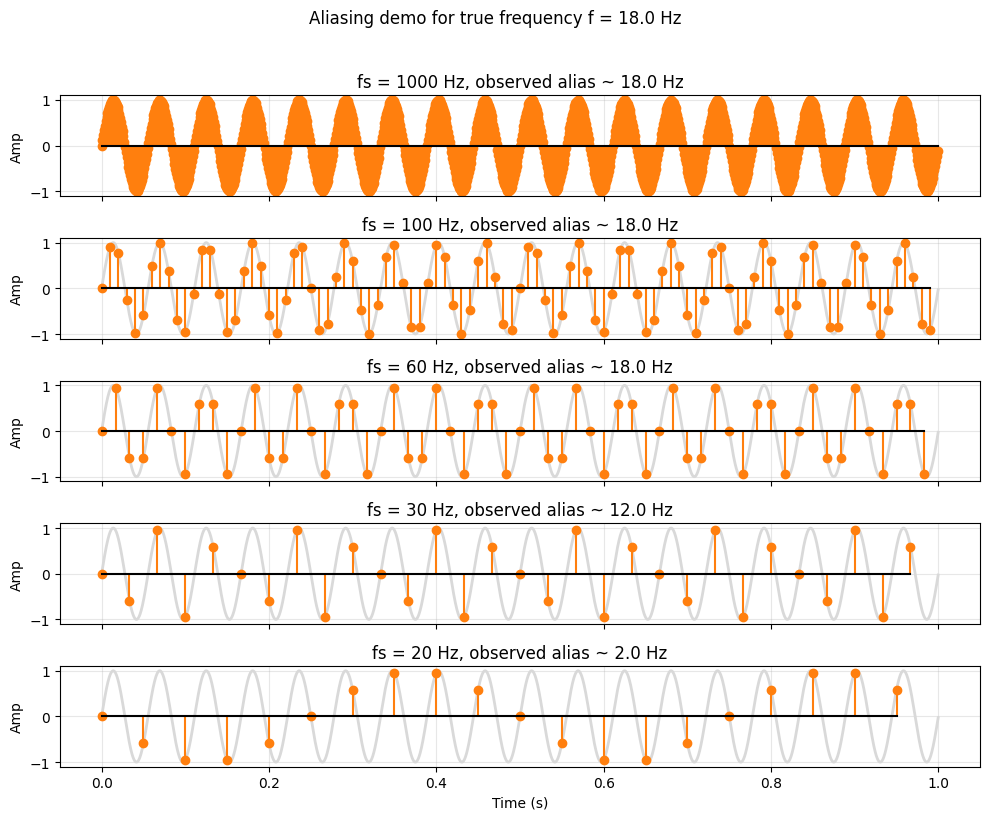

In [34]:
f_true = 18.0  
T = 1.0    

fs_ref = 4000
t_ref = np.linspace(0, T, int(fs_ref * T), endpoint=False)
x_ref = np.sin(2 * np.pi * f_true * t_ref)

# Sampling rates to compare
fs_list = [1000, 100, 60, 30, 20]  

#Computes the 'apparent' frequency we observe when sampling at fs Hz
def alias_frequency(f, fs):
    k = np.round(f / fs)
    f_alias = np.abs(f - k * fs)
    if f_alias > fs / 2:
        f_alias = fs - f_alias
    return f_alias

fig, axes = plt.subplots(len(fs_list), 1, figsize=(10, 8), sharex=True)

for ax, fs in zip(axes, fs_list):
    n = np.arange(0, int(T * fs))
    t_s = n / fs
    x_s = np.sin(2 * np.pi * f_true * t_s)

    ax.plot(t_ref, x_ref, color='0.85', lw=2, label='true signal (dense)')
    ax.stem(t_s, x_s, linefmt='C1-', markerfmt='C1o', basefmt='k-')

    f_a = alias_frequency(f_true, fs)
    nyq = fs / 2
    ax.set_title(f'fs = {fs} Hz, observed alias ~ {f_a:.1f} Hz')
    ax.grid(alpha=0.3)

axes[-1].set_xlabel('Time (s)')
for ax in axes:
    ax.set_ylabel('Amp')

plt.suptitle(f'Aliasing demo for true frequency f = {f_true} Hz', y=1.02)
plt.tight_layout()
plt.show()

**Nyquist-Shannon Sampling Theorem (practical form)**

If a continuous-time signal contains no frequencies above \(f_{\max}\), then it can be reconstructed from its samples without loss when:

$$
f_s > 2 f_{\max}
$$

- $2f_{\max}$ is the **Nyquist rate**.
- $f_s/2$ is the **Nyquist frequency**.

If $f_s < 2f_{\max}$, high-frequency components fold into lower frequencies (**aliasing**), and exact reconstruction is impossible.

**Rule of thumb:** to analyze frequencies up to $f_{\max}$, sample at least a little higher than $2f_{\max}$ (often 3-5x in practice), and use an anti-alias filter.

<div style="color: blue;">
How would you compute the period and the frequency from the given signal?
</div>

In [ ]:
#!!!!!!
np.linspace(5,10, 30)
np.arange(5,10,0.1)

array([ 5.        ,  5.17241379,  5.34482759,  5.51724138,  5.68965517,
        5.86206897,  6.03448276,  6.20689655,  6.37931034,  6.55172414,
        6.72413793,  6.89655172,  7.06896552,  7.24137931,  7.4137931 ,
        7.5862069 ,  7.75862069,  7.93103448,  8.10344828,  8.27586207,
        8.44827586,  8.62068966,  8.79310345,  8.96551724,  9.13793103,
        9.31034483,  9.48275862,  9.65517241,  9.82758621, 10.        ])

In [46]:
np.diff(np.linspace(5,10, 30))

array([0.17241379, 0.17241379, 0.17241379, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.17241379, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.17241379, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.17241379, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.17241379, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.17241379, 0.17241379])

array([5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2,
       6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5,
       7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8,
       8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [47]:
T

1.0

In [ ]:
t_ref = np.linspace(0, T, int(fs_ref * T))

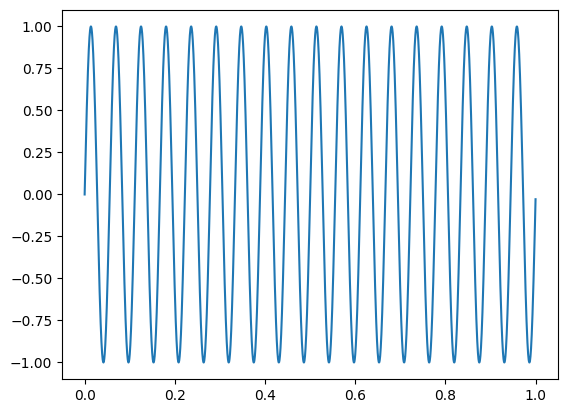

In [48]:
plt.plot(t_ref,x_ref)

In [67]:
import scipy.signal

In [69]:
peaks

(array([  56,  278,  500,  722,  944, 1167, 1389, 1611, 1833, 2056, 2278,
        2500, 2722, 2944, 3167, 3389, 3611, 3833]),
 {})

In [75]:
peaks[0]

array([  56,  278,  500,  722,  944, 1167, 1389, 1611, 1833, 2056, 2278,
       2500, 2722, 2944, 3167, 3389, 3611, 3833])

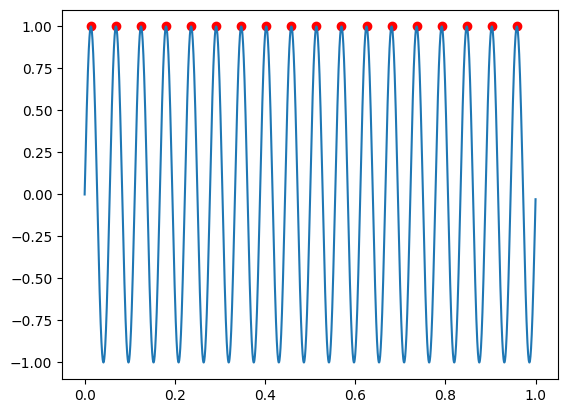

In [ ]:
peaks = scipy.signal.find_peaks(x_ref)
plt.plot(t_ref, x_ref)
plt.scatter(t_ref[peaks[0]], x_ref[peaks[0]], color='red')


In [81]:
diff_period = np.diff(t_ref[peaks[0]])


In [90]:
t_ref[peaks[0]][2]-t_ref[peaks[0]][3|]

SyntaxError: invalid syntax (2688635424.py, line 1)

In [86]:
t_ref[peaks[0]]

array([0.014  , 0.0695 , 0.125  , 0.1805 , 0.236  , 0.29175, 0.34725,
       0.40275, 0.45825, 0.514  , 0.5695 , 0.625  , 0.6805 , 0.736  ,
       0.79175, 0.84725, 0.90275, 0.95825])

(array([14.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([0.0555  , 0.055525, 0.05555 , 0.055575, 0.0556  , 0.055625,
        0.05565 , 0.055675, 0.0557  , 0.055725, 0.05575 ]),
 <BarContainer object of 10 artists>)

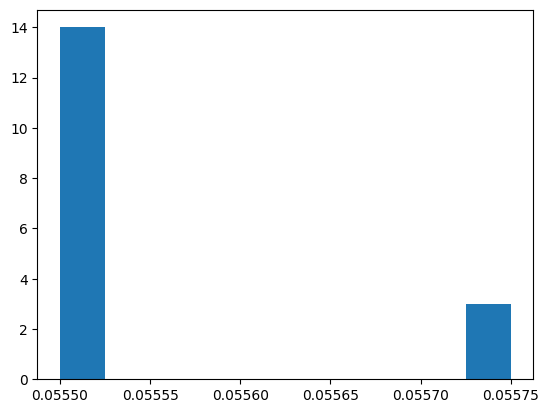

In [84]:
plt.hist(diff_period ,10)

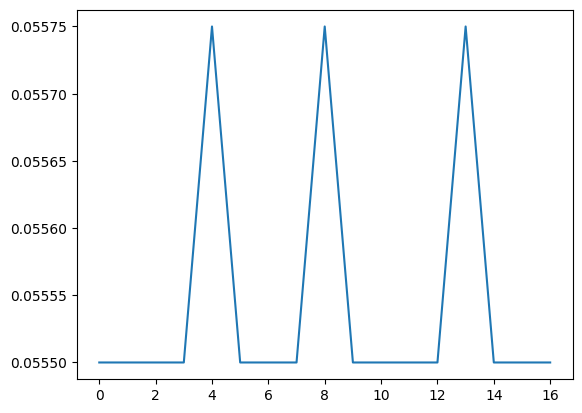

In [85]:
plt.plot(diff_period)

In [92]:
1/np.mean(diff_period)

np.float64(18.003706645485835)

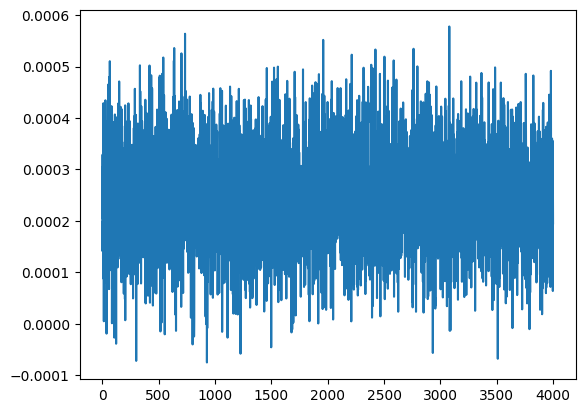

In [55]:
plt.plot(np.diff(t_ref)+np.random.randn(len(t_ref)-1)*0.0001)

In [56]:
aa=np.diff(t_ref)+np.random.randn(len(t_ref)-1)*0.0001

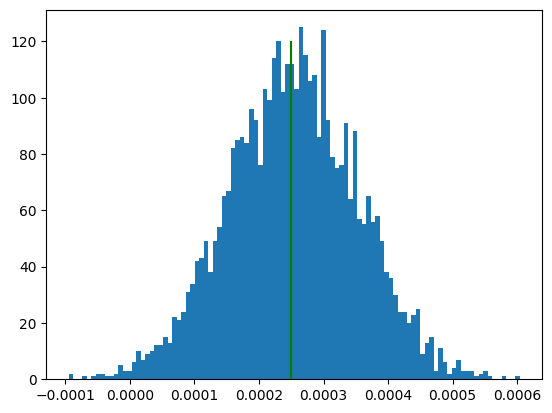

In [65]:
plt.hist(aa,100)
plt.vlines(np.mean(np.diff(t_ref)),color='red', ymin=0, ymax=120)
plt.vlines(np.median(np.diff(t_ref)),color='green', ymin=0, ymax=120)

In [66]:
1/np.mean(np.diff(t_ref))

np.float64(4000.0)

<StemContainer object of 3 artists>

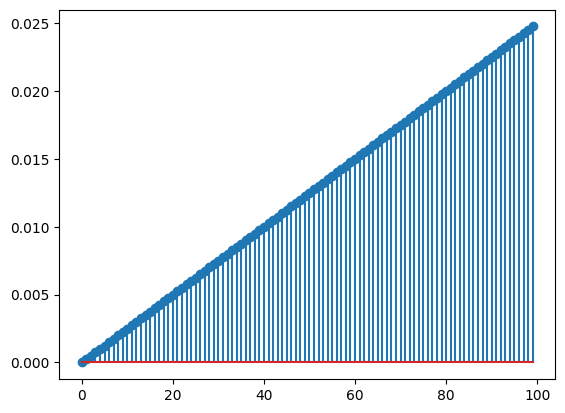

In [38]:
plt.stem(t_ref[:100])

<StemContainer object of 3 artists>

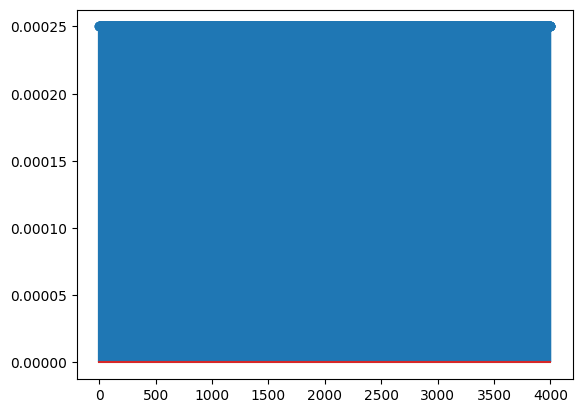

In [39]:
plt.stem(np.diff(t_ref))

In [41]:
noise_std = 0.1
x_noisy = x_ref+noise_std*np.random.randn(len(x_ref))

dt = np.mean(np.diff(t_ref))
fs_est = 1/dt
fs_est

np.float64(4000.0)

In [ ]:
t_start = 0.225
t_end = 0.25



**Quantization** (analog -> digital) is the process of mapping the continuous amplitude values to a finite set of digital values. In practice, the continuous-time signal is sampled and quantized to create a discrete-time signal.



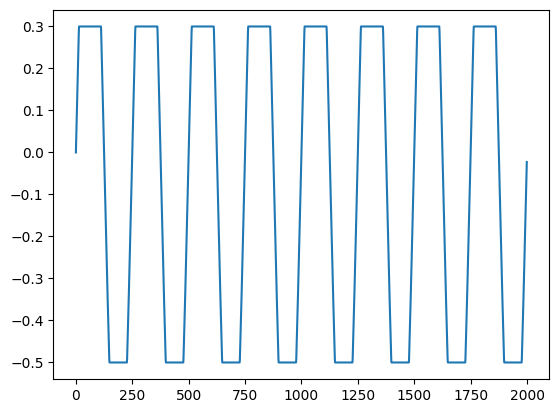

In [96]:
plt.plot(np.clip(x, -0.5, 0.3))

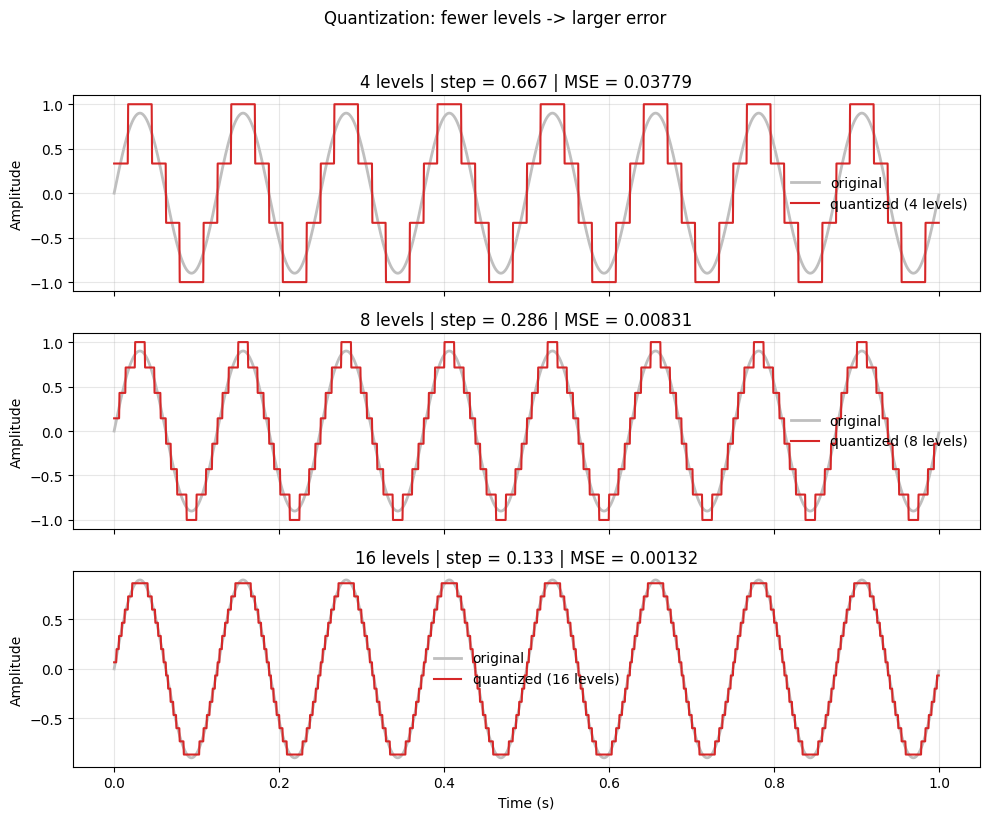

In [93]:
import numpy as np
import matplotlib.pyplot as plt

fs_dense = 2000
T = 1.0
f = 8
t = np.linspace(0, T, int(fs_dense * T), endpoint=False)
x = 0.9 * np.sin(2 * np.pi * f * t)

# Quantization function
def quantize(signal, n_levels, x_min=-1.0, x_max=1.0):
    step = (x_max - x_min) / (n_levels - 1)
    x_clip = np.clip(signal, x_min, x_max)
    x_q = np.round((x_clip - x_min) / step) * step + x_min
    return x_q, step

levels_list = [4, 8, 16]
fig, axes = plt.subplots(len(levels_list), 1, figsize=(10, 8), sharex=True)

for ax, L in zip(axes, levels_list):
    x_q, step = quantize(x, n_levels=L, x_min=-1, x_max=1)
    err = x - x_q
    mse = np.mean(err**2)

    ax.plot(t, x, color='0.75', lw=2, label='original')
    ax.plot(t, x_q, color='C3', lw=1.5, label=f'quantized ({L} levels)')
    ax.set_title(f'{L} levels | step = {step:.3f} | MSE = {mse:.5f}')
    ax.set_ylabel('Amplitude')
    ax.grid(alpha=0.3)
    ax.legend(frameon=False)

axes[-1].set_xlabel('Time (s)')
plt.suptitle('Quantization: fewer levels -> larger error', y=1.02)
plt.tight_layout()
plt.show()

Demo with the sound file:

Loaded: /Users/dkleeva/Library/Caches/librosa/456440__inspectorj__bird-whistling-robin-single-13.ogg
fs=22050 Hz, duration=2.70 s
Original:


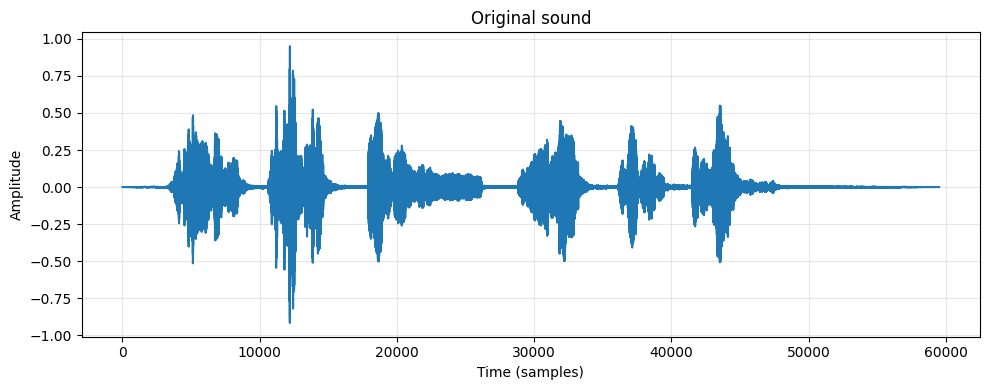

In [97]:
# %pip install librosa soundfile scipy

import librosa
from scipy.signal import resample_poly
from IPython.display import Audio, display

path = librosa.ex("robin") 
x, fs = librosa.load(path, sr=None, mono=True)

x = 0.95 * x / (np.max(np.abs(x)) + 1e-12)

print(f"Loaded: {path}")
print(f"fs={fs} Hz, duration={len(x)/fs:.2f} s")
print("Original:")
display(Audio(x, rate=fs))

plt.figure(figsize=(10, 4))
plt.plot(x, lw=1.5)
plt.title('Original sound')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<div style="color: blue;">
Compute the representative frequency content of the sound.
</div>

In [107]:
fs

22050

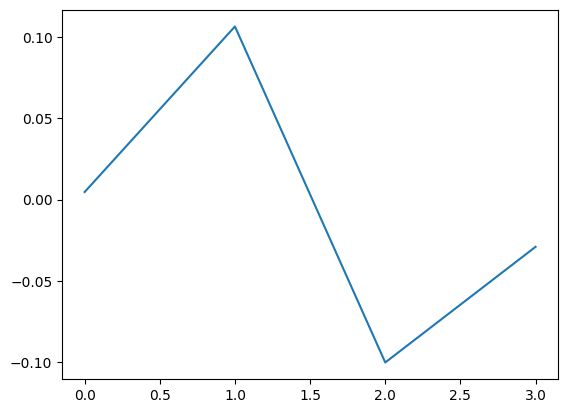

In [119]:
tmin, tmax = 11042, 11046
plt.plot(x[tmin:tmax], lw=1.5)

In [120]:
T=(tmax-tmin)/fs
f_obs=1/T
f_obs

5512.5

Let's check ourselves!

**Spectrum (first intuition without formal definition)**

A time signal tells us how amplitude changes over time.  
A spectrum is another view of the same signal: it shows how strongly different oscillation rates (frequencies, in Hz) are present.

Important: the spectrum does **not** add new data; it is a re-expression of the same recording in frequency terms.  
So we use two complementary views:

- **Time domain:** when changes happen
- **Frequency domain (spectrum):** which rhythms are present and how strong they are

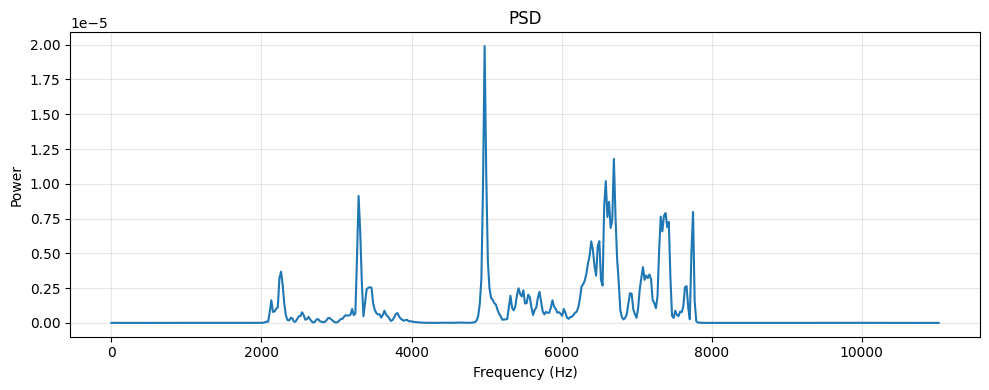

In [115]:
plt.figure(figsize=(10, 4))
from scipy.signal import welch
f, Pxx = welch(x, fs=fs, nperseg=1024)
plt.plot(f, Pxx, lw=1.5)
plt.title('PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(alpha=0.3)
plt.tight_layout()

<div style="color: blue;">
Now let's listen to the sound under sampling and quantization.
</div>

In [121]:
fs

22050

In [126]:
low_rates = [16000, 10000]

for fs_new in low_rates:
    x_new = resample_poly(x, fs_new, fs)
    display(Audio(x_new, rate=fs_new))

In [129]:
quant_levels=[16, 8, 4, 2]

for q in quant_levels:
    x_q, step = quantize(x, n_levels=q)
    display(Audio(x_q, rate=fs))


## Signal building blocks

### Unit sample (impulse) signal

The **unit sample** (or discrete impulse) is denoted by $\delta[n]$:

$$
\delta[n] =
\begin{cases}
1, & n=0 \\
0, & n\neq 0
\end{cases}
$$

It is the simplest nonzero discrete-time signal: only one sample is equal to 1, all others are 0.

Why it is important:

- It is a basic building block for discrete signals.
- Any discrete signal can be represented as a weighted sum of shifted impulses.
- In system analysis, the response to $\delta[n]$ (impulse response) tells us how a linear system behaves.

Intuition: $\delta[n]$ is a “one-sample click” in time.

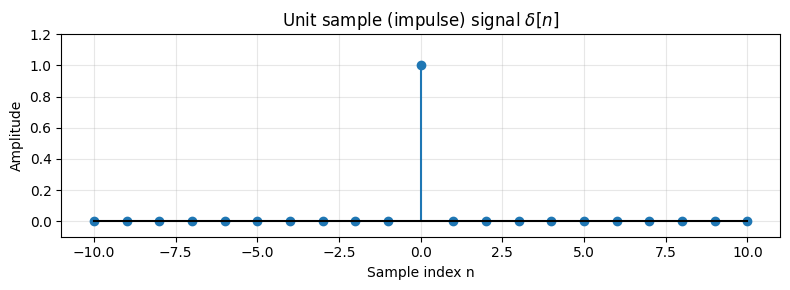

In [130]:
n = np.arange(-10, 11)

delta = np.zeros_like(n, dtype=float)
delta[n == 0] = 1.0

plt.figure(figsize=(8, 3))
plt.stem(n, delta, linefmt='C0-', markerfmt='C0o', basefmt='k-')
plt.title('Unit sample (impulse) signal $\\delta[n]$')
plt.xlabel('Sample index n')
plt.ylabel('Amplitude')
plt.ylim(-0.1, 1.2)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The shift:

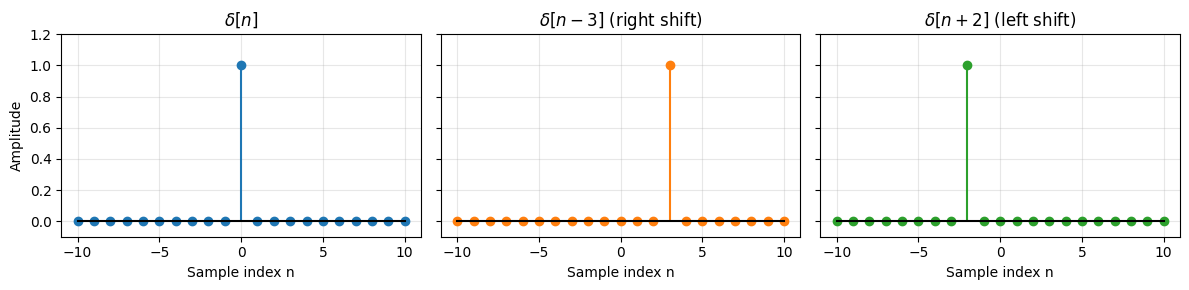

In [131]:
import numpy as np
import matplotlib.pyplot as plt


n = np.arange(-10, 11)

delta = np.zeros_like(n, dtype=float)
delta[n == 0] = 1.0

k_right = 3
k_left = 2

delta_right = np.zeros_like(n, dtype=float) 
delta_right[n == k_right] = 1.0

delta_left = np.zeros_like(n, dtype=float)   
delta_left[n == -k_left] = 1.0

fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

ax[0].stem(n, delta, linefmt='C0-', markerfmt='C0o', basefmt='k-')
ax[0].set_title(r'$\delta[n]$')

ax[1].stem(n, delta_right, linefmt='C1-', markerfmt='C1o', basefmt='k-')
ax[1].set_title(r'$\delta[n-3]$ (right shift)')

ax[2].stem(n, delta_left, linefmt='C2-', markerfmt='C2o', basefmt='k-')
ax[2].set_title(r'$\delta[n+2]$ (left shift)')

for a in ax:
    a.set_xlabel('Sample index n')
    a.set_ylim(-0.1, 1.2)
    a.grid(alpha=0.3)

ax[0].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

<div style="color: blue;">
Show that any discrete signal can be represented as a weighted sum of shifted impulses.
</div>

In [133]:
for i, k in enumerate(n):
    print(i, k)

0 -5
1 -4
2 -3
3 -2
4 -1
5 0
6 1
7 2
8 3
9 4
10 5


In [ ]:
x+=1
x=x+1

0.0


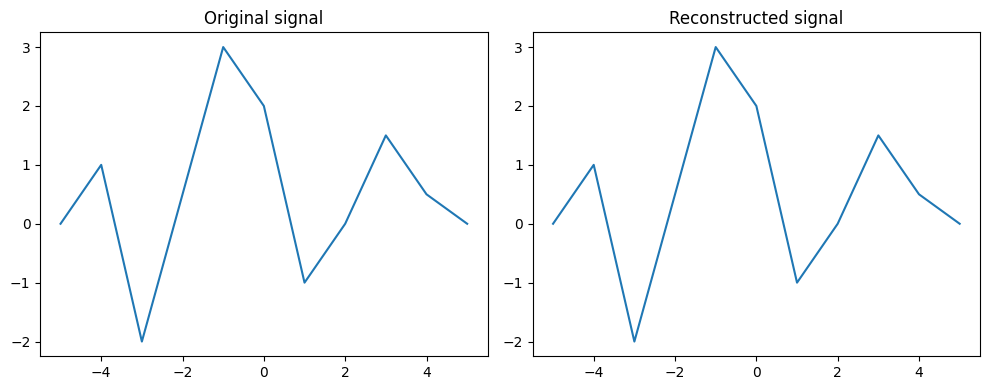

In [134]:
n = np.arange(-5,6)

x =np.array([0,1,-2,0.5, 3, 2,-1,0,1.5, 0.5, 0])

x_rec = np.zeros_like(x, dtype=float)

for i, k in enumerate(n):
    delta_shifted = np.zeros_like(x)
    delta_shifted[i] = 1.0
    x_rec += x[i]*delta_shifted

err = np.max(np.abs(x-x_rec))

print(err)

fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].plot(n, x, lw=1.5)
ax[0].set_title('Original signal')

ax[1].plot(n, x_rec, lw=1.5)
ax[1].set_title('Reconstructed signal')

plt.tight_layout()
plt.show()






### Unit step signal

The **unit step** signal is denoted by $u[n]$:

$$
u[n] =
\begin{cases}
1, & n \ge 0 \\
0, & n < 0
\end{cases}
$$

It models a signal that is "off" before $(n=0$ and "on" from $n=0$ onward.

Why it is important:

- It is used to represent signal onset (sudden start).
- Many practical signals can be written using shifted/scaled step functions.
- It is closely related to the unit sample:

$$
\delta[n] = u[n] - u[n-1]
$$

(the impulse is the discrete difference of two steps).

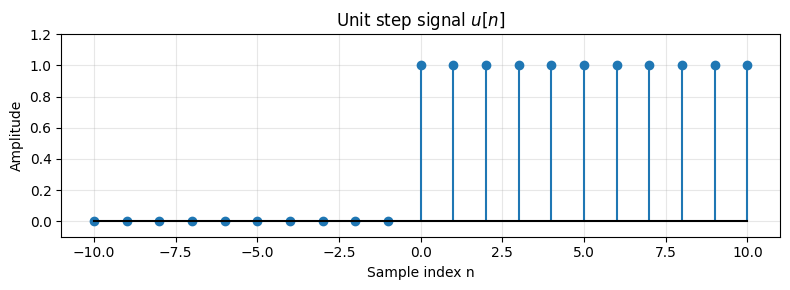

In [135]:
n = np.arange(-10, 11)

# Unit step: u[n] = 1 for n>=0, 0 otherwise
u = (n >= 0).astype(float)

plt.figure(figsize=(8, 3))
plt.stem(n, u, linefmt='C0-', markerfmt='C0o', basefmt='k-')
plt.title('Unit step signal $u[n]$')
plt.xlabel('Sample index n')
plt.ylabel('Amplitude')
plt.ylim(-0.1, 1.2)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<div style="color: blue;">
Show that the impulse is the discrete difference of the two steps.
</div>

<StemContainer object of 3 artists>

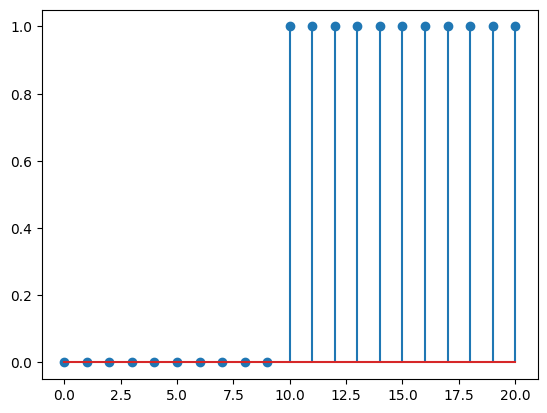

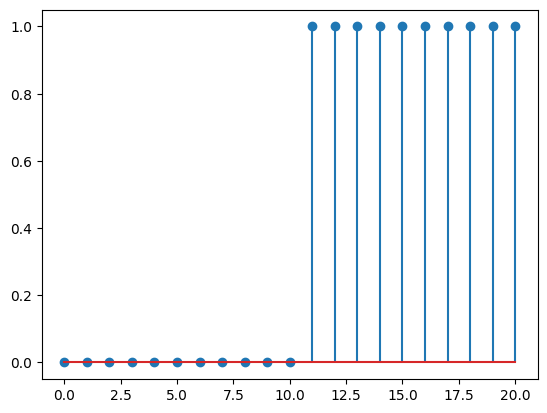

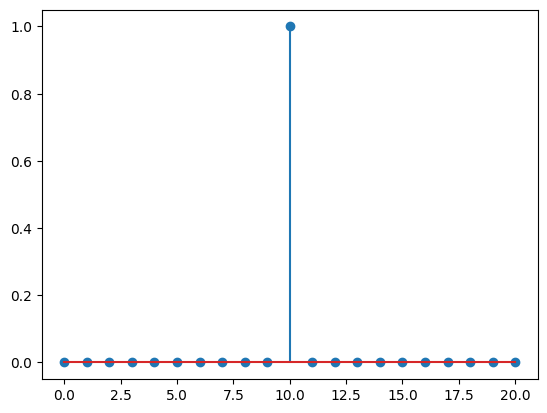

In [142]:
n = np.arange(-10,11)

u_n = (n>=0).astype(float)

u_n1 = (n>=1).astype(float)

delta_from_steps = u_n - u_n1

plt.figure()
plt.stem(u_n)
plt.figure()
plt.stem(u_n1)

plt.figure()
plt.stem(delta_from_steps)





### Other basic signals (preview)

Besides impulse and step, other common signal representations are:

- **Constant (DC) signal:** $x[n] = C$  
  A fixed level over time (baseline component).

- **Ramp signal:** $r[n] = n\,u[n]$  
  Increases linearly with sample index (simple trend model).

- **Exponential signal:** $x[n] = a^n u[n]$  
  Models growth ($|a|>1$) or decay ($0<|a|<1$); with $a<0$, signs alternate.

## Typical structures in MNE Python

In [143]:
import mne
from mne.datasets import sample

In [144]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = f'{sample_data_folder}/MEG/sample/sample_audvis_raw.fif'

In [ ]:
# edf
#.mat
#.set

In [145]:
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)

Opening raw data file /Users/dkleeva/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


In [159]:
raw.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

In [160]:
raw.first_samp

25800

In [162]:
raw.info['sfreq']

600.614990234375

In [161]:
raw.first_samp/raw.info['sfreq']

42.95597082905339

In [163]:
raw.times

array([0.00000000e+00, 1.66496011e-03, 3.32992022e-03, ...,
       2.77710351e+02, 2.77712016e+02, 2.77713681e+02])

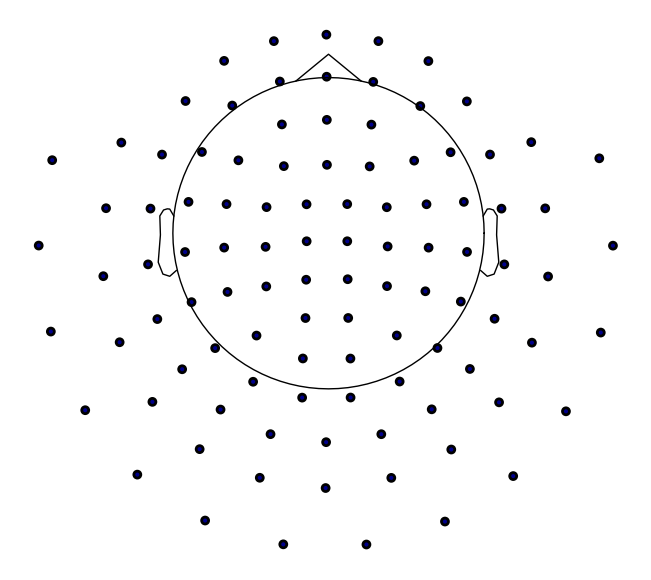

In [165]:
fig=raw.plot_sensors()

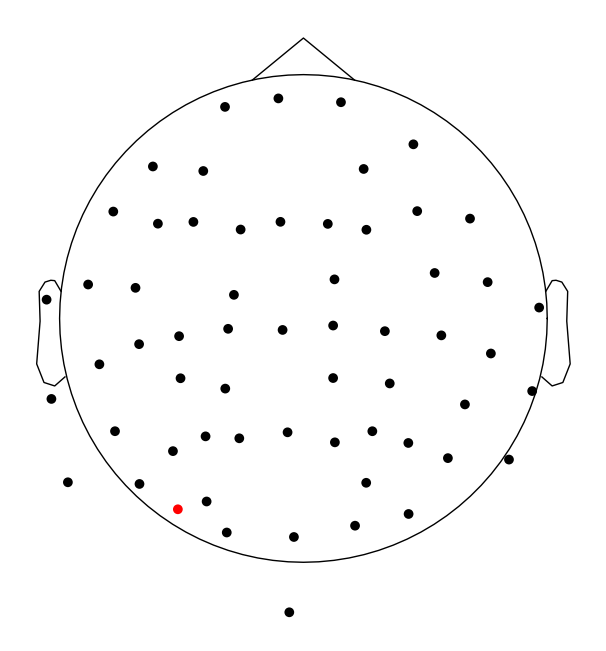

In [166]:
fig=raw.plot_sensors(ch_type='eeg', show_names=False)

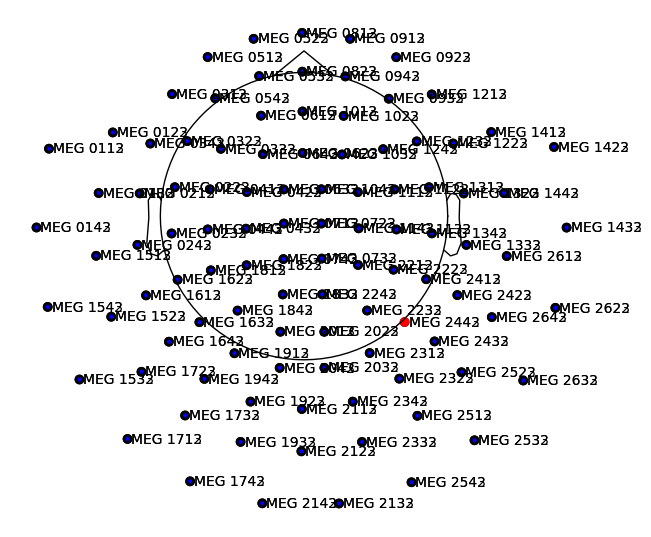

In [167]:
fig=raw.plot_sensors(ch_type='grad', show_names=True)

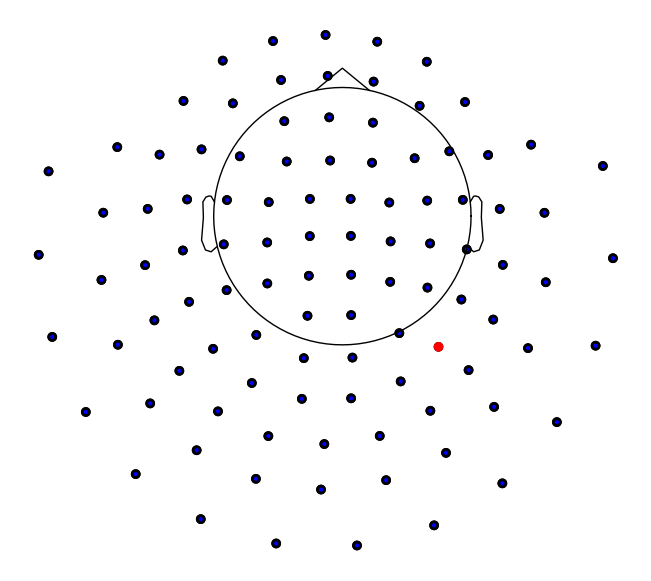

In [172]:
fig=raw.plot_sensors(ch_type='grad', show_names=False, sphere=(0.01, 0.02, 0.01, 0.075))

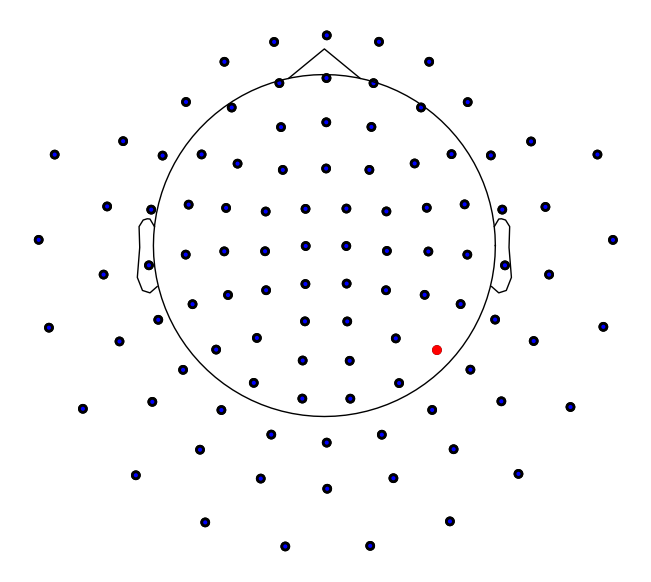

In [177]:
fig=raw.plot_sensors(ch_type='grad', show_names=False, sphere=0.1)

## Look at the data

Using matplotlib as 2D backend.


/Users/dkleeva/Library/Python/3.9/lib/python/site-packages/mne/viz/_figure.py:372: RuntimeWarning: divide by zero encountered in matmul
  data = self.mne.projector @ data
/Users/dkleeva/Library/Python/3.9/lib/python/site-packages/mne/viz/_figure.py:372: RuntimeWarning: overflow encountered in matmul
  data = self.mne.projector @ data
/Users/dkleeva/Library/Python/3.9/lib/python/site-packages/mne/viz/_figure.py:372: RuntimeWarning: invalid value encountered in matmul
  data = self.mne.projector @ data


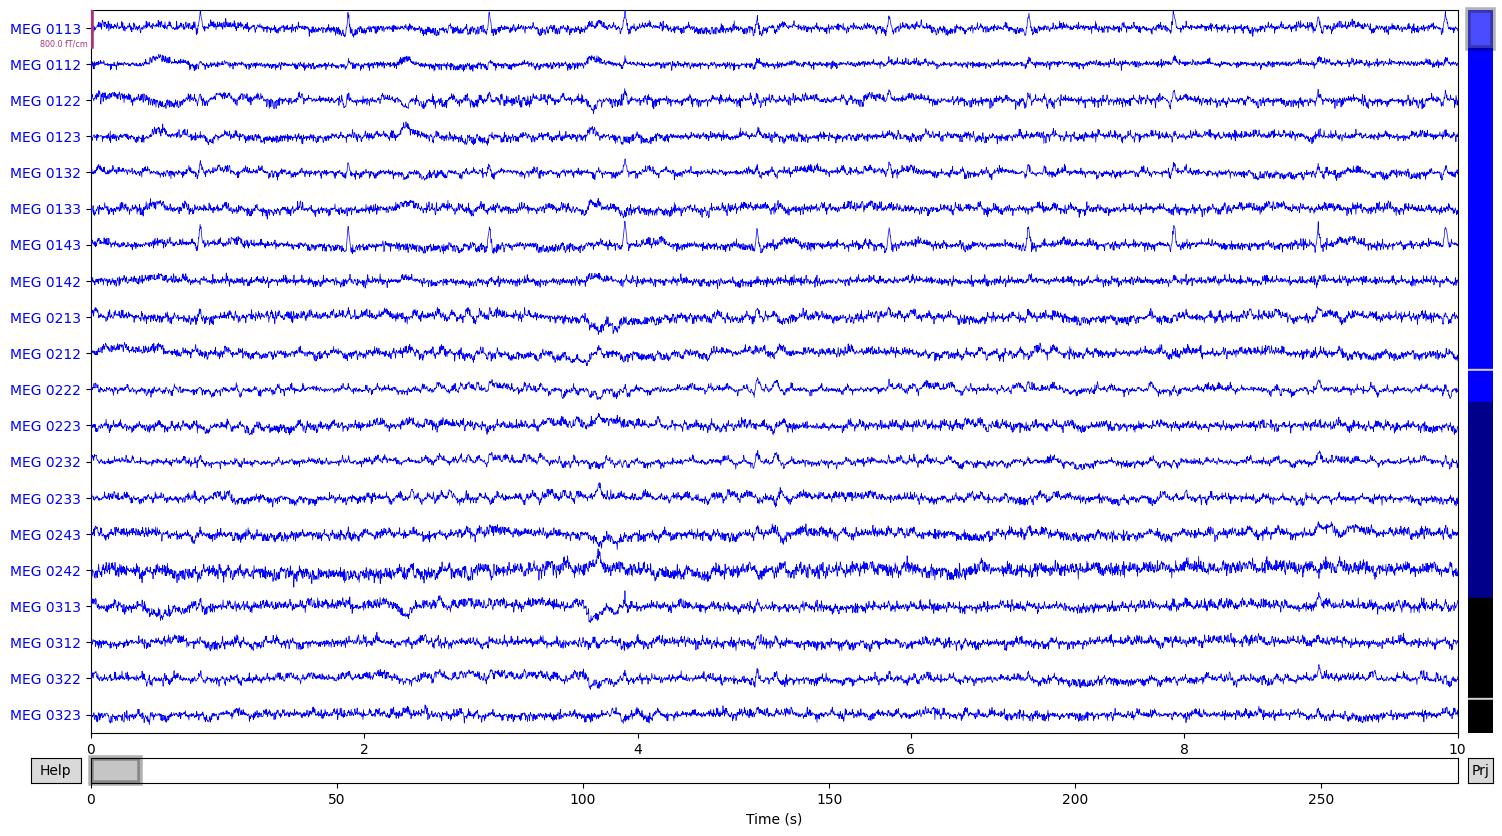

/Users/dkleeva/Library/Python/3.9/lib/python/site-packages/mne/viz/_figure.py:372: RuntimeWarning: divide by zero encountered in matmul
  data = self.mne.projector @ data
/Users/dkleeva/Library/Python/3.9/lib/python/site-packages/mne/viz/_figure.py:372: RuntimeWarning: overflow encountered in matmul
  data = self.mne.projector @ data
/Users/dkleeva/Library/Python/3.9/lib/python/site-packages/mne/viz/_figure.py:372: RuntimeWarning: invalid value encountered in matmul
  data = self.mne.projector @ data
/Users/dkleeva/Library/Python/3.9/lib/python/site-packages/mne/viz/_figure.py:372: RuntimeWarning: divide by zero encountered in matmul
  data = self.mne.projector @ data
/Users/dkleeva/Library/Python/3.9/lib/python/site-packages/mne/viz/_figure.py:372: RuntimeWarning: overflow encountered in matmul
  data = self.mne.projector @ data
/Users/dkleeva/Library/Python/3.9/lib/python/site-packages/mne/viz/_figure.py:372: RuntimeWarning: invalid value encountered in matmul
  data = self.mne.proje

Channels marked as bad:
['MEG 2443', 'EEG 053']


In [178]:
%matplotlib qt
raw.plot()

In [ ]:
raw_filt = raw.copy().filter(1., 40., fir_design='firwin')

In [ ]:
raw_filt.plot()

In [ ]:
raw.plot_psd(fmin=1., fmax=60., tmax=60., average=False)

In [ ]:
raw_filt.plot_psd(fmin=1., fmax=60., tmax=60., average=False)

## References and montage

raw_ref = raw.copy().set_eeg_reference(ref_channels=['EEG 001'])
raw_ref.plot()

Phase reversal demo:

In [ ]:
%matplotlib inline
# Time axis
fs = 500
T = 2.0
t = np.arange(int(fs * T)) / fs

# Base background activity
bg = 0.15 * np.sin(2 * np.pi * 8 * t)

# Sharp transient centered at t0 
t0 = 1.0
sigma = 0.015
sharp = np.exp(-0.5 * ((t - t0) / sigma) ** 2)

# Simulate 3 adjacent electrodes: F3 - C3 - P3
# Source maximal at C3, weaker at neighbors
F3 = bg + 0.4 * sharp
C3 = bg + 1.0 * sharp
P3 = bg + 0.4 * sharp

# Bipolar derivations
F3_C3 = F3 - C3
C3_P3 = C3 - P3

fig, ax = plt.subplots(2, 1, figsize=(11, 7), sharex=True)


ax[0].plot(t, F3, label='F3 (referential-like)')
ax[0].plot(t, C3, label='C3 (referential-like)')
ax[0].plot(t, P3, label='P3 (referential-like)')
ax[0].axvline(t0, color='k', ls='--', alpha=0.5)
ax[0].set_title('Sharp transient maximal at C3')
ax[0].set_ylabel('Amplitude')
ax[0].grid(alpha=0.3)
ax[0].legend(frameon=False, ncol=3)


ax[1].plot(t, F3_C3, label='F3 - C3', color='C1')
ax[1].plot(t, C3_P3, label='C3 - P3', color='C2')
ax[1].axvline(t0, color='k', ls='--', alpha=0.5)
ax[1].set_title('Bipolar channels: phase reversal around the sharp transient')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Amplitude')
ax[1].grid(alpha=0.3)
ax[1].legend(frameon=False)

plt.tight_layout()
plt.show()

In [ ]:
%matplotlib qt

raw_bip = mne.set_bipolar_reference(raw.copy(), anode = ['EEG 001', 'EEG 004', 'EEG 008'], 
                                    cathode = ['EEG 004', 'EEG 008', 'EEG 018'])
raw_bip.plot()

In [ ]:
raw_av = raw.copy().set_eeg_reference(ref_channels='average')
raw_av.plot()

In [ ]:
import mne

# Example (assumes raw already loaded and EEG channels present)
montage = mne.channels.make_standard_montage("standard_1020")

raw.set_montage(montage, match_case=False, on_missing="warn")

print(raw.get_montage())
print(f"EEG channels: {len(mne.pick_types(raw.info, eeg=True))}")

# Optional quick check (spatial layout)
raw.plot_sensors(show_names=True)

In [ ]:
all_montages = mne.channels.get_builtin_montages()
print(f"Total built-in montages: {len(all_montages)}")
for name in all_montages:
    print(name)

In [ ]:
montage = mne.channels.make_standard_montage("standard_1020")

raw.set_montage(montage, match_case=False, on_missing="warn")

print(raw.get_montage())
print(f"EEG channels: {len(mne.pick_types(raw.info, eeg=True))}")


In [ ]:
mapping={'EEG 001': 'Fp1'}
raw.rename_channels(mapping)
raw.copy().pick('eeg').plot_sensors(show_names=True)

## Stimulus channel, events, and annotations

In [ ]:
raw.copy().pick(picks="stim").plot(start=10, duration=10)

In [ ]:
events = mne.find_events(raw, stim_channel="STI 014")

In [ ]:
events

In [ ]:
fig = mne.viz.plot_events(events, raw.info['sfreq'], raw.first_samp)

In [ ]:
testing_data_folder = mne.datasets.testing.data_path()
eeglab_raw_file = testing_data_folder / "EEGLAB" / "test_raw.set"
eeglab_raw = mne.io.read_raw_eeglab(eeglab_raw_file)
print(eeglab_raw.annotations)

In [ ]:
%matplotlib qt
eeglab_raw.plot()

In [ ]:
eeglab_raw.annotations.description

In [ ]:
eeglab_raw.annotations.onset

In [ ]:
eeglab_raw.annotations.duration

In [ ]:
events_from_annot, event_dict = mne.events_from_annotations(eeglab_raw)
print(event_dict)
print(events_from_annot)

In [ ]:
%matplotlib inline
fig = mne.viz.plot_events(events_from_annot, eeglab_raw.info['sfreq'], eeglab_raw.first_samp)

In [ ]:
manual_annot = mne.Annotations(onset=[5, 41], duration=[16, 11], description=["Manual_marker"] * 2)
raw.set_annotations(manual_annot)
(manual_events, manual_event_dict) = mne.events_from_annotations(raw, chunk_duration=1.5)
print(manual_event_dict)
print(manual_events)
fig = mne.viz.plot_events(manual_events, raw.info['sfreq'], raw.first_samp)


In [ ]:
%matplotlib qt
fig = raw.plot()
fig.fake_keypress("a")